In [30]:
!pip install catboost

    100% |████████████████████████████████| 60.6MB 586kB/s 


In [0]:
# Basic Libraries for Data organization, Statistical operations and Plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Evaluation of Model
from sklearn import metrics as sm

# To supress warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

#To perform kFold Cross Validation
from sklearn.model_selection import StratifiedKFold


from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

In [7]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [0]:
import io
df= pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [0]:
pd.set_option('display.max_columns', 111)

In [63]:
#Viewing the Data
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [64]:
df.shape

(233154, 41)

In [65]:
#To check missing values
df.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [66]:
#Shape of data
df.shape

(233154, 41)

In [0]:
#Seperating target variable 
Loan_Default = df["loan_default"]

In [0]:
#Dropping the target variable from dataframe
df.drop("loan_default",axis=1,inplace= True)

In [0]:
#to change the type and format of date of birth from object to datetime 
from datetime import datetime

def try_parsing_date(text):
    for fmt in ('%d-%m-%y', '%d/%m/%Y'):
        try:
            return datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')

dob=[]
for i in df["Date.of.Birth"]:
    dob.append(try_parsing_date(i))

df["Date.of.Birth"]=dob


In [0]:
#calculating age and adding it as feature to data 
from datetime import date

def calculate_age(born):
    today = date.today()
    return today.year - born.year 

age=[]
for i in df["Date.of.Birth"]:
    if calculate_age(i)>0:
        age.append(calculate_age(i))
    else:
        v=calculate_age(i)+100
        age.append(v)

df["Age"]=age


In [0]:
#changing the format and type of CREDIT.HISTORY.LENGTH column from object to float
df["CREDIT.HISTORY.LENGTH"].head()

df["CREDIT.HISTORY.LENGTH"] =df["CREDIT.HISTORY.LENGTH"].str.replace("yrs",".")
df["CREDIT.HISTORY.LENGTH"] = df["CREDIT.HISTORY.LENGTH"].str.replace("mon","")

df["CREDIT.HISTORY.LENGTH"]= df["CREDIT.HISTORY.LENGTH"].str.replace(' ', '')

col=[]
for i in df["CREDIT.HISTORY.LENGTH"]:
    col.append(float(str(i)))
    

df["CREDIT.HISTORY.LENGTH"]=col


In [0]:
#changing the format and type of AVERAGE.ACCT.AGE column from object to float
df["AVERAGE.ACCT.AGE"].head()

df["AVERAGE.ACCT.AGE"] =df["AVERAGE.ACCT.AGE"].str.replace("yrs",".")
df["AVERAGE.ACCT.AGE"] = df["AVERAGE.ACCT.AGE"].str.replace("mon","")

df["AVERAGE.ACCT.AGE"]= df["AVERAGE.ACCT.AGE"].str.replace(' ', '')

col=[]
for i in df["AVERAGE.ACCT.AGE"]:
    col.append(float(str(i)))
    

df["AVERAGE.ACCT.AGE"]=col


In [0]:
#feature engineering
df['ACTIVE.ACCTS']=df['PRI.ACTIVE.ACCTS']+df['SEC.ACTIVE.ACCTS']
df['CURRENT.BALANCE']=df['PRI.CURRENT.BALANCE']+df['SEC.CURRENT.BALANCE']
df['DISBURSED.AMOUNT']=df['PRI.DISBURSED.AMOUNT']+df['SEC.DISBURSED.AMOUNT']
df['NO.OF.ACCTS']=df['SEC.NO.OF.ACCTS']+df['PRI.NO.OF.ACCTS']
df['OVERDUE.ACCTS']=df['PRI.OVERDUE.ACCTS']+df['SEC.OVERDUE.ACCTS']
df['SANCTIONED.AMOUNT']=df['PRI.SANCTIONED.AMOUNT']+df['SEC.SANCTIONED.AMOUNT']
df['INSTAL.AMT']=df['PRIMARY.INSTAL.AMT']+df['SEC.INSTAL.AMT']

df['SANCTION_DISBURSED']=df['SANCTIONED.AMOUNT']-df['DISBURSED.AMOUNT']

df['NO_DEACTIVE_ACCOUNTS']=df['NO.OF.ACCTS']-df['ACTIVE.ACCTS']
df['NO.OF.ACC.BEF.SIX.MONTH']=df['NO.OF.ACCTS']-df['NEW.ACCTS.IN.LAST.SIX.MONTHS']
df['OVERDUE.ACC.BEF.SIX.MONTHS']=df['OVERDUE.ACCTS']-df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']
df['CLEAN.ACC']=df['NO.OF.ACCTS']-(df['ACTIVE.ACCTS']+df['OVERDUE.ACCTS'])


df['asset_value']=df['disbursed_amount']*(df['ltv']/100)
df['value_cost']=df['asset_cost']-df['asset_value']
df['value_per_cost']=df['value_cost']/df['asset_value']
df['extra_finance']=df['asset_cost']*(df['ltv']/100)-df['disbursed_amount']
df['asset_disburse']=(df['asset_cost']-df['disbursed_amount'])/df['disbursed_amount']
df['sixmmonths_dfault']=df['NEW.ACCTS.IN.LAST.SIX.MONTHS']-df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']


In [50]:
df.shape

(233154, 59)

In [0]:
#imputation of missing values in Employment.Type column by its mode 
df["Employment.Type"].mode()

df["Employment.Type"]=df["Employment.Type"].fillna("Self employed")

In [75]:
#dropping unnecessary columns
df.drop(["Date.of.Birth"],axis=1,inplace= True)

df.shape

(233154, 58)

transformation categorical columns to integer

In [0]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

df["Employment.Type"]= label_encoder.fit_transform(df["Employment.Type"])
df["PERFORM_CNS.SCORE.DESCRIPTION"]= label_encoder.fit_transform(df["PERFORM_CNS.SCORE.DESCRIPTION"])
df["DisbursalDate"]= label_encoder.fit_transform(df["DisbursalDate"])


In [54]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Age,ACTIVE.ACCTS,CURRENT.BALANCE,DISBURSED.AMOUNT,NO.OF.ACCTS,OVERDUE.ACCTS,SANCTIONED.AMOUNT,INSTAL.AMT,SANCTION_DISBURSED,NO_DEACTIVE_ACCOUNTS,NO.OF.ACC.BEF.SIX.MONTH,OVERDUE.ACC.BEF.SIX.MONTHS,CLEAN.ACC,asset_value,value_cost,value_per_cost,extra_finance,asset_disburse,sixmmonths_dfault
0,420825,50578,58400,89.55,67,22807,45,1441,0,2,6,1998,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0,35,0,0,0,0,0,0,0,0,0,0,0,0,45292.5990,13107.4010,0.289394,1719.2000,0.154652,0
1,537409,47145,65550,73.23,67,22807,45,1502,1,68,6,1998,1,1,0,0,0,0,598,8,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1.11,1.11,0,34,1,27600,50200,1,1,50200,1991,0,0,1,0,-1,34524.2835,31025.7165,0.898664,857.2650,0.390391,-1
2,417566,53278,61360,89.63,67,22807,45,1497,1,0,6,1998,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0,34,0,0,0,0,0,0,0,0,0,0,0,0,47753.0714,13606.9286,0.284944,1718.9680,0.151695,0
3,624493,57513,66113,88.48,67,22807,45,1501,1,69,6,1998,1,1,0,0,0,0,305,11,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0.80,1.30,1,26,0,0,0,3,0,0,31,0,3,3,0,3,50887.5024,15225.4976,0.299199,983.7824,0.149531,0
4,539055,52378,60300,88.39,67,22807,45,1495,1,68,6,1998,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,1,42,0,0,0,0,0,0,0,0,0,0,0,0,46296.9142,14003.0858,0.302463,921.1700,0.151247,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 58 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Employment.Type                        233154 non-null int64
DisbursalDate                          233154 non-null int64
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                            233154 non-null int64
PAN_flag                         

In [77]:
##Checking class imbalance
Loan_Default.value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

In [78]:
print("Minority Label percentage:",Loan_Default.value_counts()[1]/len(Loan_Default))
print("Majority Label percentage:",Loan_Default.value_counts()[0]/len(Loan_Default))

Minority Label percentage: 0.2170711203753742
Majority Label percentage: 0.7829288796246258


Data is skewed with the ration of 21.70/78.29

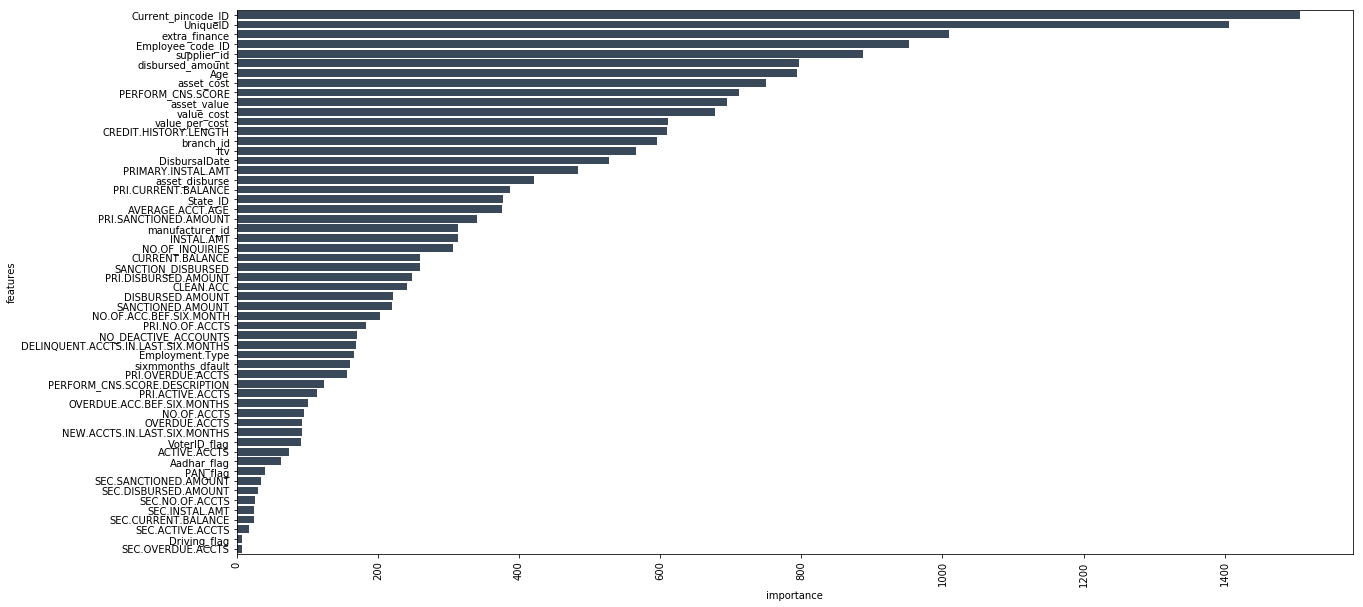

In [58]:
#Feature importance
from sklearn import model_selection, preprocessing
import xgboost as xgb
import seaborn as sn

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'silent': 1
}


dtrain = xgb.DMatrix(df,Loan_Default, feature_names=df.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

featureImportance = model.get_fscore()
features = pd.DataFrame()
features['features'] = featureImportance.keys()
features['importance'] = featureImportance.values()
features.sort_values(by=['importance'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
plt.xticks(rotation=90)
sn.barplot(data=features.head(140),x="importance",y="features",ax=ax,orient="h",color="#34495e")

In [0]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(df,Loan_Default,test_size=0.20,random_state=30)

In [81]:
# Decision Tree Classifier with startified k fold
from sklearn.metrics import confusion_matrix,roc_auc_score
auc=[]
from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
i=1
for train_index, test_index in fold.split(X_train,y_train):
    X_trainn, X_testt = X_train.iloc[train_index], X_train.iloc[test_index]
    y_trainn, y_testt = y_train.iloc[train_index], y_train.iloc[test_index]
    m=DecisionTreeClassifier(random_state=42)
    m.fit(X_trainn,y_trainn)
    preds=m.predict_proba(X_testt)[:,-1]
    print("roc_auc_score: ",roc_auc_score(y_testt,preds))
    auc.append(roc_auc_score(y_testt,preds))
print("final roc_auc_score:",np.mean(auc))  


roc_auc_score:  0.5303494175939374
roc_auc_score:  0.5322347971125285
roc_auc_score:  0.5275434473305947
roc_auc_score:  0.5316831884598547
roc_auc_score:  0.5227101683506056
roc_auc_score:  0.5305264312757638
roc_auc_score:  0.5350713179425489
roc_auc_score:  0.5243655381137323
roc_auc_score:  0.5283417198777987
roc_auc_score:  0.5289497000859914
final roc_auc_score: 0.5291775726143356


In [82]:
# Random Forest Classifier with startified k fold
from sklearn.metrics import confusion_matrix,roc_auc_score
auc=[]
from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
i=1
for train_index, test_index in fold.split(X_train,y_train):
    X_trainn, X_testt = X_train.iloc[train_index], X_train.iloc[test_index]
    y_trainn, y_testt = y_train.iloc[train_index], y_train.iloc[test_index]
    m=RandomForestClassifier(n_estimators = 5, criterion = 'entropy')
    m.fit(X_trainn,y_trainn)
    preds=m.predict_proba(X_testt)[:,-1]
    print("roc_auc_score: ",roc_auc_score(y_testt,preds))
    auc.append(roc_auc_score(y_testt,preds))
print("final roc_auc_score:",np.mean(auc))  

roc_auc_score:  0.5741655527106015
roc_auc_score:  0.5712629674328424
roc_auc_score:  0.5711306439285014
roc_auc_score:  0.5812898065528284
roc_auc_score:  0.5740397401078097
roc_auc_score:  0.5697075087522234
roc_auc_score:  0.5691726311595506
roc_auc_score:  0.5742632871274027
roc_auc_score:  0.578738854556119
roc_auc_score:  0.5616961066936541
final roc_auc_score: 0.5725467099021533


In [83]:
# eXtreme Gradient Boosting Classifier (XGBClassifier)
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
auc=[]
from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
i=1
for train_index, test_index in fold.split(X_train,y_train):
    X_trainn, X_testt = X_train.iloc[train_index], X_train.iloc[test_index]
    y_trainn, y_testt = y_train.iloc[train_index], y_train.iloc[test_index]
    m=XGBClassifier()
    m.fit(X_trainn,y_trainn)
    preds=m.predict_proba(X_testt)[:,-1]
    print("roc_auc_score: ",roc_auc_score(y_testt,preds))
    auc.append(roc_auc_score(y_testt,preds))
print("final roc_auc_score:",np.mean(auc))  

roc_auc_score:  0.6613041613150439
roc_auc_score:  0.6634207962186578
roc_auc_score:  0.657643825476992
roc_auc_score:  0.6619943760692676
roc_auc_score:  0.6539663160791398
roc_auc_score:  0.6665625161145277
roc_auc_score:  0.6553449782044907
roc_auc_score:  0.6597988074830841
roc_auc_score:  0.6610506321593457
roc_auc_score:  0.6563589186151851
final roc_auc_score: 0.6597445327735734


In [0]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['train.csv']))
#test = pd.read_csv(io.BytesIO(uploaded['test_bqCt9Pv.csv']))
#df1=pd.concat([train, test], ignore_index=True)
#to change the type and format of date of birth from object to datetime 
from datetime import datetime

def try_parsing_date(text):
    for fmt in ('%d-%m-%y', '%d/%m/%Y'):
        try:
            return datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')

dob=[]
for i in df1["Date.of.Birth"]:
    dob.append(try_parsing_date(i))

df1["Date.of.Birth"]=dob

#calculating age and adding it as feature to data 
from datetime import date

def calculate_age(born):
    today = date.today()
    return today.year - born.year 

age=[]
for i in df1["Date.of.Birth"]:
    if calculate_age(i)>0:
        age.append(calculate_age(i))
    else:
        v=calculate_age(i)+100
        age.append(v)

df1["Age"]=age

df1["loan_default"]=df1["loan_default"].fillna(0)

#Seperating target variable 
Loan_Default = df1["loan_default"]
#Dropping the target variable from dataframe
df1.drop("loan_default",axis=1,inplace= True)



#feature engineering
df1['ACTIVE.ACCTS']=df1['PRI.ACTIVE.ACCTS']+df1['SEC.ACTIVE.ACCTS']
df1['CURRENT.BALANCE']=df1['PRI.CURRENT.BALANCE']+df1['SEC.CURRENT.BALANCE']
df1['DISBURSED.AMOUNT']=df1['PRI.DISBURSED.AMOUNT']+df1['SEC.DISBURSED.AMOUNT']
df1['NO.OF.ACCTS']=df1['SEC.NO.OF.ACCTS']+df1['PRI.NO.OF.ACCTS']
df1['OVERDUE.ACCTS']=df1['PRI.OVERDUE.ACCTS']+df1['SEC.OVERDUE.ACCTS']
df1['SANCTIONED.AMOUNT']=df1['PRI.SANCTIONED.AMOUNT']+df1['SEC.SANCTIONED.AMOUNT']
df1['INSTAL.AMT']=df1['PRIMARY.INSTAL.AMT']+df1['SEC.INSTAL.AMT']

df1['SANCTION_DISBURSED']=df1['SANCTIONED.AMOUNT']-df1['DISBURSED.AMOUNT']

df1['NO_DEACTIVE_ACCOUNTS']=df1['NO.OF.ACCTS']-df1['ACTIVE.ACCTS']
df1['NO.OF.ACC.BEF.SIX.MONTH']=df1['NO.OF.ACCTS']-df1['NEW.ACCTS.IN.LAST.SIX.MONTHS']
df1['OVERDUE.ACC.BEF.SIX.MONTHS']=df1['OVERDUE.ACCTS']-df1['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']
df1['CLEAN.ACC']=df1['NO.OF.ACCTS']-(df1['ACTIVE.ACCTS']+df1['OVERDUE.ACCTS'])


df1['asset_value']=df1['disbursed_amount']*(df1['ltv']/100)
df1['value_cost']=df1['asset_cost']-df1['asset_value']
df1['value_per_cost']=df1['value_cost']/df1['asset_value']
df1['extra_finance']=df1['asset_cost']*(df1['ltv']/100)-df1['disbursed_amount']
df1['asset_disburse']=(df1['asset_cost']-df1['disbursed_amount'])/df1['disbursed_amount']
df1['sixmmonths_dfault']=df1['NEW.ACCTS.IN.LAST.SIX.MONTHS']-df1['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']

#imputation of missing values in Employment.Type column by its mode 
df1["Employment.Type"].mode()

df1["Employment.Type"]=df1["Employment.Type"].fillna("Self employed")

In [0]:
X_train,X_test,y_train,y_test=train_test_split(df1,Loan_Default,test_size=0.20,random_state=10)

In [33]:
#Catboost
import catboost
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
auc=[]


from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
i=1
for train_index, test_index in fold.split(X_train,y_train):
    X_trainn, X_testt = X_train.iloc[train_index], X_train.iloc[test_index]
    y_trainn, y_testt = y_train.iloc[train_index], y_train.iloc[test_index]
    #print(X_test.isnull().sum())
    categorical_features_indices = np.where(X_trainn.dtypes =='object')[0]
    m=catboost.CatBoostClassifier(n_estimators=40,cat_features=categorical_features_indices)
    m.fit(X_trainn,y_trainn)
    preds=m.predict_proba(X_testt)[:,-1]
    print("roc_auc_score: ",roc_auc_score(y_testt,preds))
    auc.append(roc_auc_score(y_testt,preds))
print("final roc_auc_score:",np.mean(auc))  

Learning rate set to 0.5
0:	learn: 0.5524705	total: 497ms	remaining: 19.4s
1:	learn: 0.5191652	total: 947ms	remaining: 18s
2:	learn: 0.5091666	total: 1.39s	remaining: 17.1s
3:	learn: 0.5039614	total: 1.8s	remaining: 16.2s
4:	learn: 0.5023431	total: 2.22s	remaining: 15.5s
5:	learn: 0.5005264	total: 2.69s	remaining: 15.2s
6:	learn: 0.4995518	total: 3.14s	remaining: 14.8s
7:	learn: 0.4988037	total: 3.55s	remaining: 14.2s
8:	learn: 0.4981440	total: 3.97s	remaining: 13.7s
9:	learn: 0.4976751	total: 4.41s	remaining: 13.2s
10:	learn: 0.4971743	total: 4.83s	remaining: 12.7s
11:	learn: 0.4967174	total: 5.23s	remaining: 12.2s
12:	learn: 0.4960890	total: 5.66s	remaining: 11.7s
13:	learn: 0.4953087	total: 6.13s	remaining: 11.4s
14:	learn: 0.4948873	total: 6.6s	remaining: 11s
15:	learn: 0.4945485	total: 7.03s	remaining: 10.5s
16:	learn: 0.4943817	total: 7.43s	remaining: 10.1s
17:	learn: 0.4940353	total: 7.84s	remaining: 9.59s
18:	learn: 0.4937717	total: 8.29s	remaining: 9.16s
19:	learn: 0.4935145	t

In [0]:
#testing
pred=m.predict_proba(X_test)[:,-1]

In [35]:
roc_auc_score(y_test,pred)

0.6636094083860865

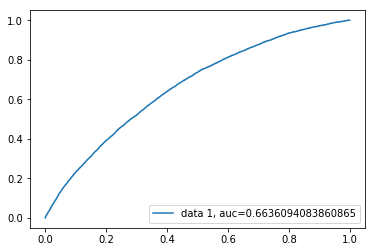

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
fpr, tpr, _ = roc_curve(y_test,pred)
auc = roc_auc_score(y_test,pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()